<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1Fzeto6TLeE4_-GMS-k_83pAk9agy_zi7?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bagussatya/DeepLearning-TensorFlow/blob/main/Convolutional%20Neural%20Networks/Convolutional%20Neural%20Networks%20-%20TensorFlow.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

#Horse vs Human Image Classification

##Data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./horse-or-human.zip

--2022-02-10 14:30:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.214.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M   118MB/s    in 1.2s    

2022-02-10 14:30:25 (118 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
# file direktori dengan gambar kuda untuk training
train_horse_dir = os.path.join('./horse-or-human/horses')

# file direktori dengan gambar manusia untuk training
train_human_dir = os.path.join('./horse-or-human/humans')

In [4]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [5]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

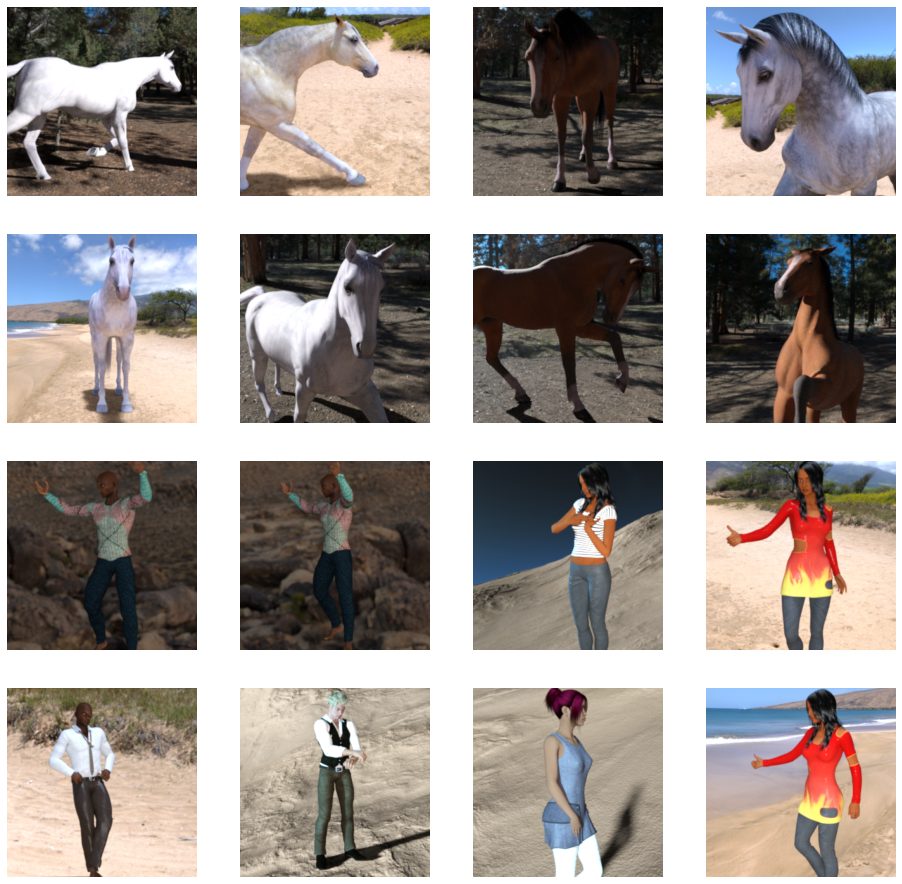

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Kita mau keluarin gambar dengan format 4x4
nrows = 4
ncols = 4

# index untuk iterasi
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# resize nilai matriks pada gambar
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # Sumber gambar
        target_size=(300, 300),  # resize gambar menjadi 300x300 piksel
        batch_size=128,
        subset='training',
        class_mode='binary')

val_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # Sumber gambar
        target_size=(300, 300),  # resize gambar menjadi 300x300 piksel
        batch_size=128,
        subset='validation',
        class_mode='binary')

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value 0 or 1 where 0 for ('horses') and 1 for ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(
      train_generator,
      validation_data=val_generator,  
      epochs=5)

Epoch 1/5
7/7 [==============================] - 43s 4s/step - loss: 0.7036 - accuracy: 0.5085 - val_loss: 0.6894 - val_accuracy: 0.5122
Epoch 2/5
7/7 [==============================] - 26s 4s/step - loss: 0.6341 - accuracy: 0.6521 - val_loss: 0.4691 - val_accuracy: 0.9561
Epoch 3/5
7/7 [==============================] - 26s 4s/step - loss: 0.3044 - accuracy: 0.8942 - val_loss: 0.1848 - val_accuracy: 0.9415
Epoch 4/5
7/7 [==============================] - 26s 4s/step - loss: 0.2649 - accuracy: 0.8893 - val_loss: 0.1712 - val_accuracy: 0.9366
Epoch 5/5
7/7 [==============================] - 26s 4s/step - loss: 0.2525 - accuracy: 0.8929 - val_loss: 0.2193 - val_accuracy: 0.9268


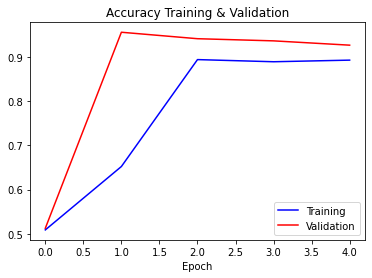

In [12]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

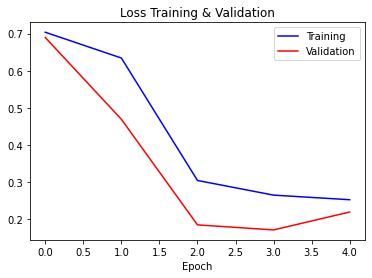

In [13]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

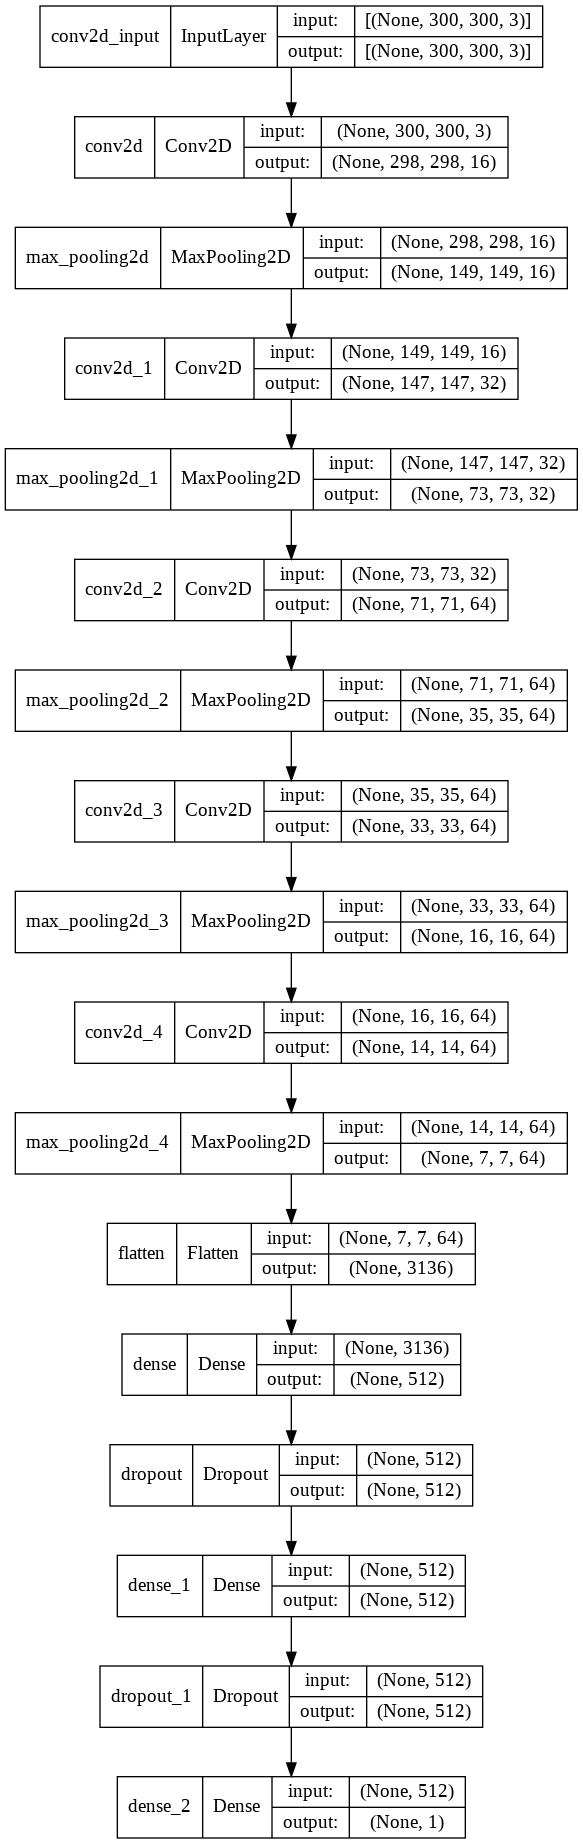

In [14]:
tf.keras.utils.plot_model(
    model, to_file='model.png',show_shapes=True)

Saving donovan.jpg to donovan.jpg


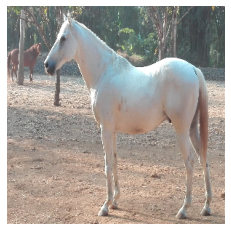

[0.]
donovan.jpg is a horse


In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")